In [21]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from IPython.display import Latex

In [9]:
# In this section, we introduce two errors, namely, absolute error and relative error.
# absolute error is defined as: absolute error = true value - approximate value = x_T - x_A
# the relative error is defined as: relative error = error / true value = (x_T - x_A) / x_T
x_T = np.pi
x_A = 22. / 7.
abs_err = x_T - x_A
rel_err = abs_err / x_T
print('        true value: %.10f' % x_T)
print('approximated value: %.10f' % x_A)
print('     absolut error: %.10f' % abs_err)
print('    relative error: %.10f' % rel_err)

        true value: 3.1415926536
approximated value: 3.1428571429
     absolut error: -0.0012644893
    relative error: -0.0004024994


In [10]:
# relative error vs absolute error, which one is better ? Try the following two examples:
# Example 1
# Suppose the exact distance between NYC and Albany is x_T = 152miles, and the Google maps gives me
# an estimated distance x_A=151miles. 
x_T = 152.0 # miles
x_A = 151.0 # miles
abs_err = x_T - x_A
rel_err = abs_err / x_T
print('-'*40)
print('        true value: %.10f' % x_T)
print('approximated value: %.10f' % x_A)
print('     absolut error: %.10f' % abs_err)
print('    relative error: %.10f' % rel_err)
# Example 2
# Suppose the exact distance between UAlbany to Crossgates is x_T = 2miles, and the Google maps gives me
# an estimated distance x_A = 1miles. Then two errors are:
x_T = 2.0 # miles
x_A = 1.0 # miles
abs_err = x_T - x_A
rel_err = abs_err / x_T
print('-'*40)
print('        true value: %.10f' % x_T)
print('approximated value: %.10f' % x_A)
print('     absolut error: %.10f' % abs_err)
print('    relative error: %.10f' % rel_err)

# We can see that the estimation of Example 1 is much better than Example 2, 
# in this case, the relative error is more accurate.

----------------------------------------
        true value: 152.0000000000
approximated value: 151.0000000000
     absolut error: 1.0000000000
    relative error: 0.0065789474
----------------------------------------
        true value: 2.0000000000
approximated value: 1.0000000000
     absolut error: 1.0000000000
    relative error: 0.5000000000


In [11]:
# Significant digits

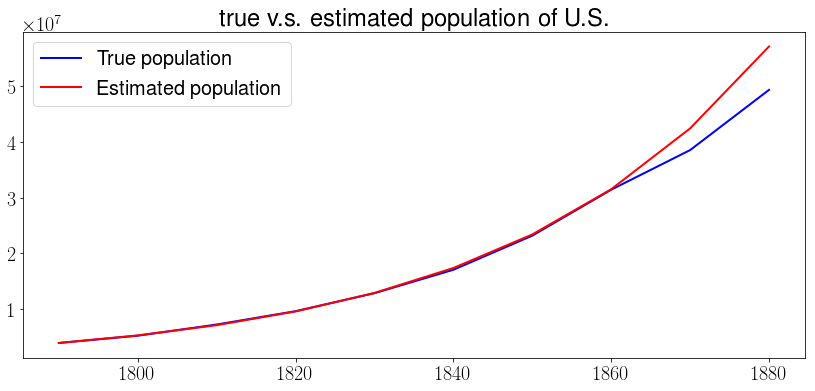

In [24]:
# 5 types of errors

# type-1: modeling errors
def population_growth_model(t):
    k = 0.02975
    n_0 = 3929000 * np.exp(-1790*k)
    population = n_0 * np.exp(k * t)
    return population

list_years = [1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880]
# true populations listed by years.
true_populations = [3929214, 5236631, 7239881, 9638453, 12866020,
                    17069453, 23191876, 31443321, 38558371, 49371340]
# get approximated populations by population growth model.
approxi_populations = [population_growth_model(year) for year in list_years]
plt.plot(list_years,true_populations,linewidth=2.,color='blue',label='True population')
plt.plot(list_years,approxi_populations,linewidth=2.,color='red',label='Estimated population')
plt.title('true v.s. estimated population of U.S.')
plt.legend()
plt.show()

In [26]:
# type-2: blunders and mistakes
# Example 1
pi = 3.1415826
# Example 2
x = 'True'
if x=='true':
    print('The value of x is True.')
else:
    print('The value of x is False.')
# Example 3
x = 0.0
num_iter = 0
while x != 1.0:
    x += 0.1
    if num_iter > 200:
        print('Dangerous code!')
        break
    num_iter += 1

The value of x is False.
Dangerous code!


In [27]:
# type-3: Physical measurement errors
# Example: the speed of light in a vacuum is 
epsilon_max = 0.000003
epsilon_min = -0.000003
c_max = (2.997925 + epsilon_max) * (10. ** 10.) # cm/sec
c_min = (2.997925 + epsilon_min) * (10. ** 10.) # cm/sec
# because the physical data contain an error, any numerical procedure based on 
# these observations will contain the effect of this observational errors.
print('%.7e %.7e' % (c_min,c_max))

2.9979220e+10 2.9979280e+10


In [28]:
# type-4: machine representation and arithmetic errors
# rounding / chopping, we already introduced this before.
x = np.float32(0.1)
print('%.32f' % x)

0.10000000149011611938476562500000


In [29]:
# type-5: mathematical approximation errors
# consider evaluating the integral
Latex(r"""\begin{equation} I = \int_0^1 e^{-x^2} d x \end{equation}""")

<IPython.core.display.Latex object>

In [30]:
# which can be approximated by
Latex(r"""\begin{equation} 
e^{-x^2} \approx 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} + \frac{x^8}{4!} 
\end{equation}""")

<IPython.core.display.Latex object>

In [11]:
Latex(r"""\begin{equation} 
I \approx \int_0^1 \Big( 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} + \frac{x^8}{4!} \Big) dx
\end{equation}""")

<IPython.core.display.Latex object>

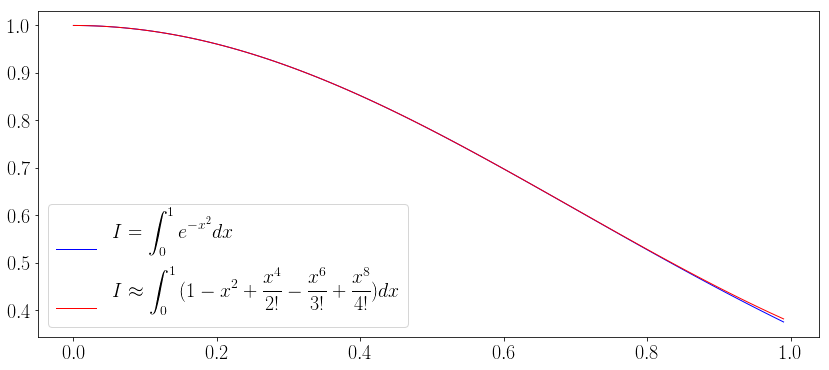

In [41]:
x = np.arange(0.0,1.0,0.01)
def original_f(x):
    return np.exp(-x**2.)
def approximated_f(x):
    # return 1.0 - x ** 2. + (x ** 4.)/2. - (x ** 6.)/6. + (x ** 8.)/24.
    return 1.0 - x ** 2. + (x ** 4.)/2. - (x ** 6.)/6. + (x ** 8.)/24.
plt.plot(x,original_f(x),linewidth=1.,color='blue',label=
         r"$\displaystyle I = \int_0^1 e^{-x^2} d x $")
plt.plot(x,approximated_f(x),linewidth=1.,color='red',label=
         r"$\displaystyle I \approx \int_0^1 \Big( 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} + \frac{x^8}{4!}  \Big) dx$")
plt.legend()
plt.show()

In [34]:
Latex(r"""\begin{equation} 
I \approx \int_0^1 \Big( 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} \Big) dx
\end{equation}""")

<IPython.core.display.Latex object>

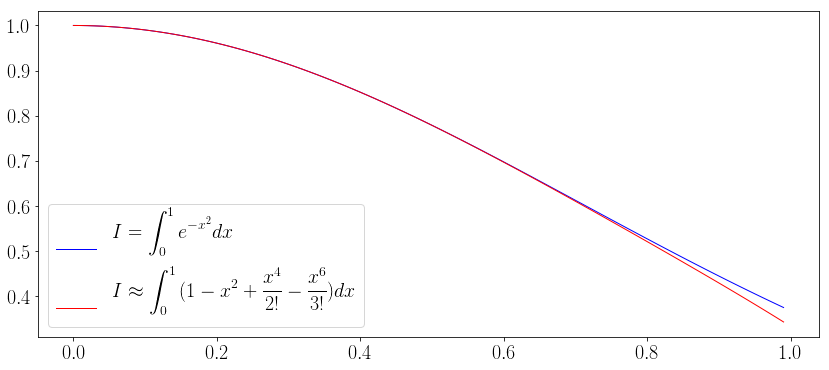

In [42]:
# Questions: try to remove some terms in approximated
x = np.arange(0.0,1.0,0.01)
def original_f(x):
    return np.exp(-x**2.)
def approximated_f(x):
    return 1.0 - x ** 2. + (x ** 4.)/2. - (x ** 6.)/6.
plt.plot(x,original_f(x),linewidth=1.,color='blue',label=
         r"$\displaystyle I = \int_0^1 e^{-x^2} d x $")
plt.plot(x,approximated_f(x),linewidth=1.,color='red',label=
         r"$\displaystyle I \approx \int_0^1 \Big( 1 - x^2 + \frac{x^4}{2!} - \frac{x^6}{3!} \Big) dx$")
plt.legend(loc='lower left')
plt.show()

In [14]:
# type-6: loss-of-significant errors.
# consider the following problem, try to evaluate the following function
Latex(r"""\begin{equation} 
f(x) = x \Big[ \sqrt{x+1} - \sqrt{x} \Big]
\end{equation}""")

<IPython.core.display.Latex object>

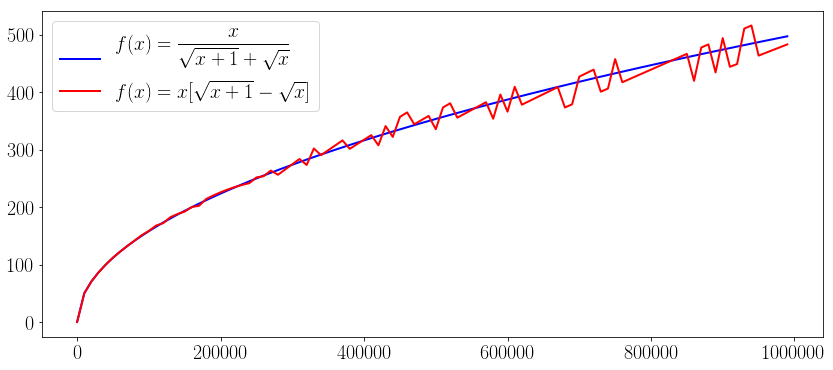

In [52]:
# Question1: try x = np.arange(0,100000,5000,dtype=np.float32)
# Question2: try x = np.arange(0,1000000,10000,dtype=np.float32)
# Question3: try x = np.arange(0,10000000,10000,dtype=np.float32)
x = np.arange(0,1000000,10000,dtype=np.float32)
def true_f(x):
    return x / (np.sqrt(x+1.,dtype=np.float32) + np.sqrt(x,dtype=np.float32))
def computed_f(x):
    return x * (np.sqrt(x+1.,dtype=np.float32) - np.sqrt(x,dtype=np.float32))
plt.plot(x,true_f(x),'-',linewidth=2.,color='blue',label=
         r"$\displaystyle f(x)= \frac{x}{\sqrt{x+1} + \sqrt{x}} $")
plt.plot(x,computed_f(x),'-',linewidth=2.,color='red',label=
         r"$\displaystyle f(x) = x \Big[ \sqrt{x+1} - \sqrt{x} \Big]$")
plt.legend()
plt.show()

In [53]:
# To avoid we can use the following equation
Latex(r"""\begin{equation} 
f(x) = x \Big[ \sqrt{x+1} - \sqrt{x} \Big] = \frac{x}{\sqrt{x+1} + \sqrt{x}}
\end{equation}""")

<IPython.core.display.Latex object>

In [54]:
# loss-of-significant errors.
# consider the following problem, try to evaluate the following function
Latex(r"""\begin{equation} 
f(x) = \frac{1-cos(x)}{x^2}
\end{equation}""")

<IPython.core.display.Latex object>

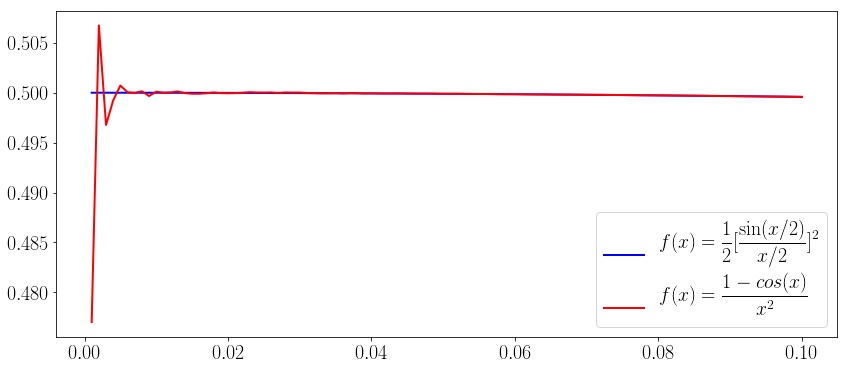

In [51]:
# a better equation is:
# Latex(r"""\begin{equation} 
# f(x) = \frac{1-cos(x)}{x^2} = \frac{1}{2} \Big[\frac{\sin(x/2)}{x/2} \Big]^2
# \end{equation}""")
x = np.arange(0.1,0.0,-1e-3,dtype=np.float32)
def true_f(x):
    return 1./2. * ((np.sin(x/2.)) / (x/2.)) ** 2.
def computed_f(x):
    return (1. - np.cos(x)) / (x ** 2.)
plt.plot(x,true_f(x),'-',linewidth=2.,color='blue',label=
         r"$\displaystyle f(x) = \frac{1}{2} \Big[\frac{\sin(x/2)}{x/2} \Big]^2$")
plt.plot(x,computed_f(x),'-',linewidth=2.,color='red', label=
         r"$\displaystyle f(x) = \frac{1-cos(x)}{x^2}$")
plt.legend()
plt.show()

In [22]:
# type-7: noise in function evaluation
# we try to evaluation the following function
Latex(r"""\begin{equation} 
f(x) = (x - 1)^3 = -1 + x (3 + x (-3 + x))
\end{equation}""")

<IPython.core.display.Latex object>

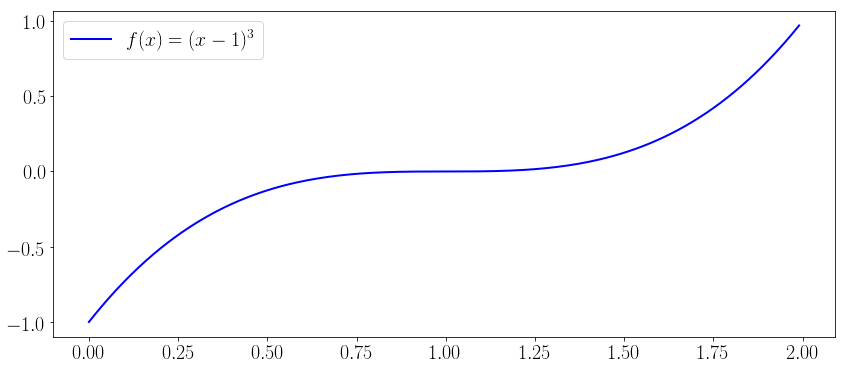

In [56]:
x = np.arange(0.0,2.0,0.01)
def fun(x):
    return (x - 1.) ** 3.
plt.plot(x,fun(x),'-',linewidth=2.,color='blue',label=r"$\displaystyle f(x) = (x-1)^3$")
plt.legend()
plt.show()

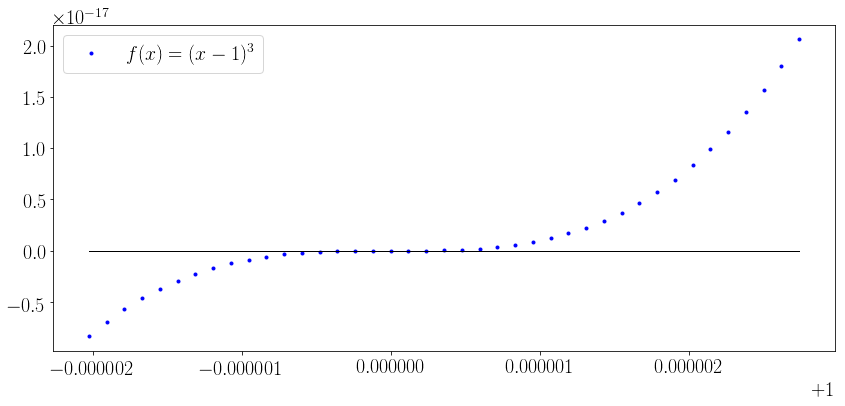

In [70]:
x = np.arange(0.999998,1.000002,0.0000001,dtype=np.float32)
def fun(x):
    return (x - np.float32(1.)) ** np.float32(3.)
plt.plot(x,fun(x),'.',linewidth=1.,color='blue',label=r"$\displaystyle f(x) = (x-1)^3$")
plt.plot(x,[0.0]*len(x),'-',linewidth=1.,color='k')
plt.legend()
plt.show()

In [25]:
# type-8 underflow and overflow
Latex(r"""\begin{equation} 
f(x) = x^{10}
\end{equation}""")

<IPython.core.display.Latex object>

[1.1701966e-38 8.5358316e-39 6.1626724e-39 4.4007624e-39 3.1059192e-39
 2.1646502e-39 1.4883709e-39 1.0085636e-39 6.7274658e-40 4.4113997e-40
 2.8393950e-40 1.7908314e-40 1.1046156e-40 6.6481803e-41 3.8940683e-41
 2.2129305e-41 1.2157665e-41 6.4291574e-42 3.2552163e-42 1.5680530e-42
 7.1326092e-43 3.0268047e-43 1.1911037e-43 4.2038954e-44 1.4012985e-44
 4.2038954e-45 1.4012985e-45 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4012985e-45
 8.4077908e-45 2.6624671e-44 7.9874012e-44 2.1019477e-43 5.1147394e-43
 1.1532686e-42 2.4466671e-42 4.9241628e-42 9.4685737e-42 1.7491007e-41
 3.1183095e-41 5.3864512e-41 9.0442605e-41 1.4803177e-40 2.3674657e-40
 3.7073873e-40 5.6949190e-40 8.5947801e-40 1.2761877e-39 1.8666585e-39
 2.6925558e-39 3.8339050e-39 5.3936006e-39 7.5027944e-39 1.0327301e-38]


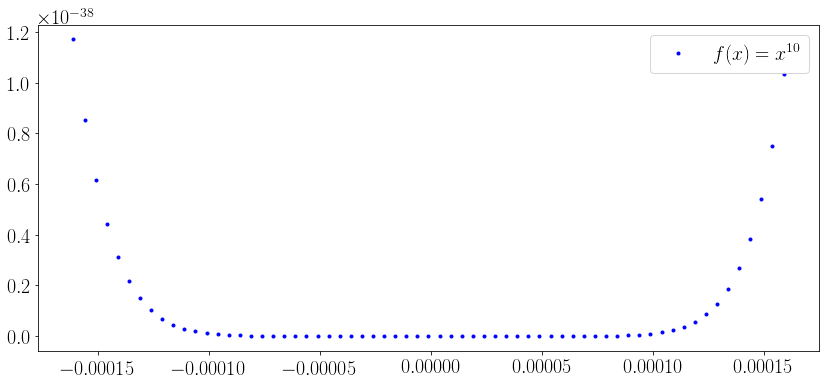

In [71]:
x = np.arange(-0.000161,0.000161,0.000005,dtype=np.float32)
def fun(x):
    return (x) ** np.float32(10.)
print(fun(x))
plt.plot(x,fun(x),'.',linewidth=1.,color='blue',label=r"$\displaystyle f(x) = x^{10}$")
plt.legend()
plt.show()

In [55]:
# another example is logitic function
# overflow error
Latex(r"""\begin{equation} 
f(x) = \frac{1}{1+e^{-x}}
\end{equation}""")

<IPython.core.display.Latex object>

/network/rit/lab/ceashpc/bz383376/opt/env-python2.7.14/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.8048513e-35 3.9754495e-31 8.7565109e-27
 1.9287499e-22 4.2483541e-18 9.3576236e-14 2.0611537e-09 4.5397872e-05
 5.0000000e-01 9.9995458e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]


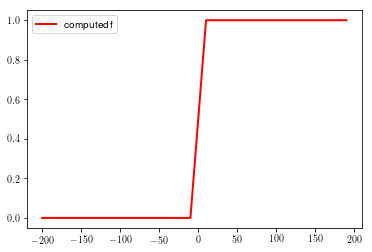

In [28]:
x = np.arange(-200.,200.0,10,dtype=np.float32)
def computed_f(x):
    return 1./(1+np.exp(-x))
print(computed_f(x))
plt.plot(x,computed_f(x),'-',linewidth=2.,color='red',label='computed f')
plt.legend()
plt.show()

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.7835059e-44 8.1940087e-40 1.8048513e-35 3.9754500e-31 8.7565109e-27
 1.9287499e-22 4.2483541e-18 9.3576229e-14 2.0611537e-09 4.5397868e-05
 5.0000000e-01 9.9995458e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]


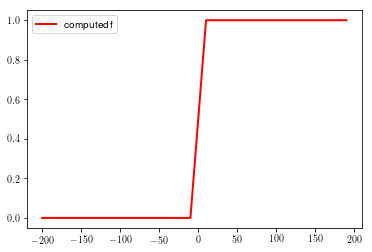

In [29]:
x = np.arange(-200.,200.0,10,dtype=np.float32)
def true_f(x):
    re = np.zeros_like(x,dtype=np.float32)
    for ind, _ in enumerate(x):
        if _ < 0.0:
            re[ind] = np.exp(_)/(1+np.exp(_))
        elif _ >= 0.0:
            re[ind] = 1./(1+np.exp(-_))
    return re
print(true_f(x))
plt.plot(x,true_f(x),'-',linewidth=2.,color='red',label='computed f')
plt.legend()
plt.show()

In [30]:
# some references
# https://en.wikipedia.org/wiki/Kahan_summation_algorithm

* Some references
* https://en.wikipedia.org/wiki/Karlsruhe_Accurate_Arithmetic
* https://en.wikipedia.org/wiki/Kahan_summation_algorithm
